In [1]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import numpy as np

/tmp/ipykernel_127596/580466376.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


## SciPy

SciPy is the second Python module that you will most likely need. It is a kind of Python toolbox for numerical computation, the objective of the module being, as a reminder, to have available in Python an environment dedicated to scientific computation like Matlab. 

SciPy is divided into different sub-modules, each with its own specificities and scope of action. The list of sub-modules of SciPy is the following:   

* Clustering package (scipy.cluster)
* Constants (scipy.constants)
* Discrete Fourier transforms (scipy.fftpack)
* Integration and ODEs (scipy.integrate)
* Interpolation (scipy.interpolate)
* Input and output (scipy.io)
* Linear algebra (scipy.linalg)
* Miscellaneous routines (scipy.misc)
* Multi-dimensional image processing (scipy.ndimage)
* Orthogonal distance regression (scipy.odr)
* Optimization and root finding (scipy.optimize)
* Signal processing (scipy.signal)
* Sparse matrices (scipy.sparse)
* Spatial algorithms and data structures (scipy.spatial)
* Special functions (scipy.special)
* Statistical functions (scipy.stats)

In the following we will of course not go through all the features of SciPy but we will focus on a few that you will certainly need to know about. For a detailed review and presentation of all the possibilities offered by SciPy I invite you to read the [documentation](https://docs.scipy.org/doc/scipy/reference/).

### scipy.interpolate

`scipy.interpolate` is a sub-module of SciPy allowing to do interpolations of data, experimental for example, and thus to be able to have evaluations of the measurement at points where data is missing.

In [2]:
import scipy.interpolate as sci

The function you laugh to use the most in this module is `interp1d` below an example of use on simulated data.

In [3]:
time_acquisition = np.linspace(0, 1, 20)
noise = (np.random.random(20)*2 - 1) * 1e-1
fake_data = np.sin(2 * np.pi * time_acquisition) + noise
interp_linear = sci.interp1d( time_acquisition, fake_data )
print( type(interp_linear) )

<class 'scipy.interpolate._interpolate.interp1d'>


The `interp_lineaire` object that we get back as output from the `interp1d` function is of a rather particular type as you can see above. In order to use it to evaluate your interpolated data at a time $t$, or at several times simultaneously, you just have to use the `interp_linear` variable as a function.

In [4]:
time_to_evaluate = np.linspace(0, 1, 100)
evaluation = interp_linear( time_to_evaluate )
print(evaluation)

[ 0.04492321  0.10749476  0.1700663   0.23263785  0.29520939  0.35778094
  0.42203753  0.48674348  0.55144942  0.61615536  0.68086131  0.72069581
  0.74244199  0.76418816  0.78593434  0.80768052  0.82806936  0.84613134
  0.86419331  0.88225529  0.90031726  0.91499783  0.91164422  0.90829061
  0.904937    0.9015834   0.89822979  0.89880472  0.8995979   0.90039109
  0.90118427  0.90197745  0.86650463  0.81807966  0.7696547   0.72122973
  0.67280476  0.62577903  0.58001262  0.53424621  0.48847979  0.44271338
  0.40203308  0.37237268  0.34271228  0.31305187  0.28339147  0.24914522
  0.17591917  0.10269313  0.02946709 -0.04375895 -0.11698499 -0.18625428
 -0.25505806 -0.32386183 -0.39266561 -0.46146939 -0.50492527 -0.53668212
 -0.56843897 -0.60019582 -0.63195266 -0.66480146 -0.69886355 -0.73292563
 -0.76698771 -0.8010498  -0.83956536 -0.89055069 -0.94153601 -0.99252133
 -1.04350666 -1.09002593 -1.05615633 -1.02228673 -0.98841713 -0.95454752
 -0.92067792 -0.90350423 -0.88946102 -0.87541781 -0

We can then have fun plotting the original data and the interpolated points

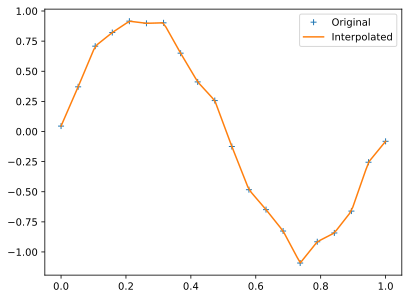

In [5]:
import matplotlib.pyplot as plt
plt.plot(time_acquisition, fake_data, "+", label="Original")
plt.plot(time_to_evaluate, evaluation, label="Interpolated")
plt.legend()

If desired, the `interp1d` function has several options, in particular the `kind` option which allows you to specify the type of interpolation to be performed. By default, the interpolation is linear, but you can also choose to perform a quadratic or cubic interpolation.

(0.85, 1.1)

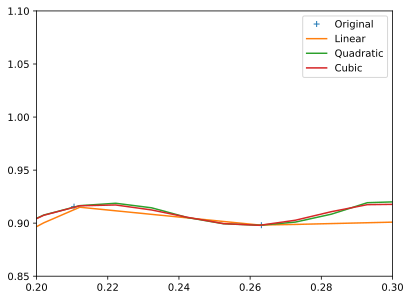

In [6]:
interp_quadratic = sci.interp1d( time_acquisition, fake_data, kind="quadratic" )
interp_cubic = sci.interp1d( time_acquisition, fake_data, kind="cubic" )
evaluation_quad = interp_quadratic( time_to_evaluate )
evaluation_cube = interp_cubic( time_to_evaluate )

plt.plot(time_acquisition, fake_data, "+", label="Original")
plt.plot(time_to_evaluate, evaluation, label="Linear")
plt.plot(time_to_evaluate, evaluation_quad, label="Quadratic")
plt.plot(time_to_evaluate, evaluation_cube, label="Cubic")
plt.legend()
plt.xlim(0.2,0.3) ## We zoom in for better
plt.ylim(0.85, 1.1) ## see the difference 

Just for information, you should know that the same function exists for data depending on two variables. It is the `interp2d` function. Its use is slightly more delicate since it requires the construction of a **regular** grid to perform the interpolation. Here is an example of application

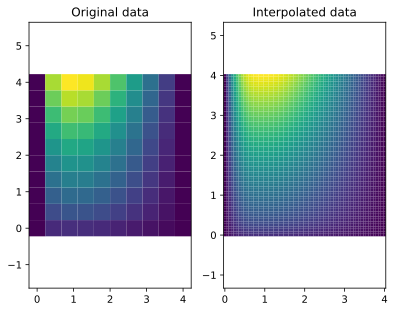

In [7]:
x = np.linspace(0, 4, 10)
y = np.linspace(0,4,10)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.pi*X**0.5/2) * np.exp(Y**0.5)

x2 = np.linspace(0, 4, 65)
y2 = np.linspace(0, 4, 65)
f = sci.interp2d(x, y, Z, kind='cubic')
Z2 = f(x2, y2)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].axis("equal")
ax[0].set_title("Original data")
ax[0].pcolormesh(X, Y, Z)


X2, Y2 = np.meshgrid(x2, y2)
ax[1].axis("equal")
ax[1].set_title("Interpolated data")
ax[1].pcolormesh(X2, Y2, Z2)

### scipy.integrate

The second sub-module of SciPy that you will most likely find useful is `scipy.integrate`. This is the module containing all the functions dedicated to : 
* integration of mathematical functions.
* Integration of Ordinary Differential Equations.

In [8]:
import scipy.integrate as sci2

First of all, in order to integrate a mathematical function on an interval, the simplest function is the `quad` function. For example if we want to calculate : 
$$I = \int_{0}^{+\infty} e^{-x} dx $$

In [9]:
f = lambda x: np.exp(-x)
value, error = sci2.quad(f, 0, np.inf)
print("I = {} ; error = {}".format(value, error))

I = 1.0000000000000002 ; error = 5.842608406478713e-11


But the most useful feature of the `scipy.integrate` module is the ability to solve ordinary first order differential equations of one or more variables. This is possible with the help of the `odeint` function. For a complete description of this function you are encouraged to read the associated [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint).  
Below is an example of integration considering the classical equation of the damped mass-spring system.

$$ \ddot{x} + 2\xi\omega_0 \dot{x} + \omega_{0}^{2} x = 0 $$

With $\omega_0 = \sqrt{\dfrac{k}{m}}$ and $\xi = \dfrac{c}{2m\omega_0}$.

In [10]:
m = 0.5 # kg
k = 4 # N/m
c = 0.4 # N s/m
xi = c / (2 * m * np.sqrt(k/m))
omega = np.sqrt(k / m)

To solve this differential equation with `odeint` it is first necessary to transform it into a first order differential equation. For that we introduce the variable $X = \begin{bmatrix} x \\ \dot{x} \end{bmatrix}$ which allows us to reduce to a system of two first order differential equations:   


$$
\frac{ d X}{dt } = \begin{bmatrix} \dot{x} \newline \ddot{x} \end{bmatrix} = 
\begin{cases}
X[1] \newline
- \xi\omega_0 X[1] - \omega_2^2 X[0] 
\end{cases} 
$$

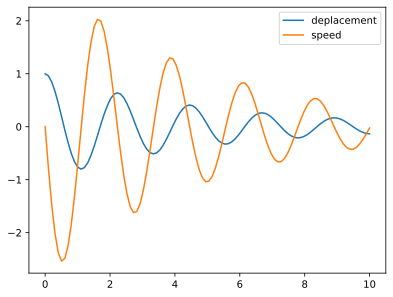

In [11]:
def dX_dt(X, time, xi, omega):
    return np.array([X[1], -xi * omega * X[1] - omega**2 * X[0]])

time_steps = np.linspace(0, 10, 100)
etat_init = np.array((1, 0)) ## (Displacement, speed)
solution = sci2.odeint(dX_dt, etat_init, time_steps, args=(xi, omega))

## Plot of the solution
plt.plot( time_steps, solution[:,0], label="deplacement")
plt.plot( time_steps, solution[:,1], label="speed")
plt.legend()

If you want to have more information about the resolution of the problem you can set the `full_output` argument to `True` which will then return a dictionary containing some information as output.

### scipy.optimize

Then SciPy also has tools for optimization. That is to say of function allowing to solve problems of the form:

$$ x = \text{argmin}\, f(x) $$

or in the form:

$$ f(x) = 0 $$

In [12]:
import scipy.optimize as sco

#### Function minimization

The first mode of use is to find the minimum of a scalar function or not. To do this, just use the `minimize` function. The latter accepts a large number of optional input parameters, including the method to use. For a description of all available methods and options you are encouraged to view the [documentation] (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize .minimize). Below is an example of using `minimize` on a 2d function.

In [13]:
def rosenbrock(X):
    x = X[0]
    y = X[1]
    a = 1. - x
    b = y - x*x
    return a*a + b*b*100.

result = sco.minimize(rosenbrock, x0=[2,1])
print(result)

      fun: 1.970038860868068e-11
 hess_inv: array([[0.51940429, 1.03576267],
       [1.03576267, 2.07088742]])
      jac: array([ 2.80122246e-06, -1.35907650e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 16
     njev: 20
   status: 0
  success: True
        x: array([0.99999556, 0.99999111])


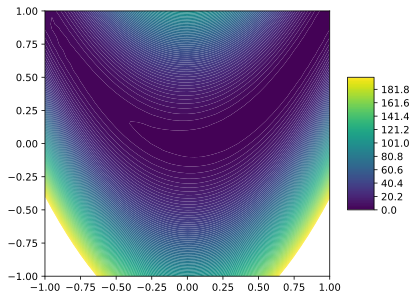

In [14]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plot
import numpy as np

fig = plot.figure()
ax = fig.gca()

s = 0.05                    # Try s=1, 0.25, 0.1, or 0.05
X = np.arange(-1, 1.+s, s)  #Could use linspace instead if dividing
Y = np.arange(-1, 1.+s, s)  #evenly instead of stepping...
    
X, Y = np.meshgrid(X, Y)
Z = (1.-X)**2 + 100.*(Y-X*X)**2
#surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
#        linewidth=0, antialiased=False)  #Try coolwarm vs jet

surf = ax.contourf(X,Y,Z, levels=np.linspace(0,200,100))
fig.colorbar(surf, shrink=0.5, aspect=5)

#### Zero of a function

The second advantage of the `scipy.optimize` module is that it allows you to determine the zero of a function. To do this, just use the `root` function. This function operates only on functions whose number of input variable is equal to the number of output.

In [15]:
def rosenbrock2(X):
    x = X[0]
    y = X[1]
    a = 1. - x
    b = y - x*x
    return np.array([a*a + b*b*100., a*a + b*b*100.])


result = sco.root(rosenbrock2, [0,0])

print(result)

    fjac: array([[-0.68279818, -0.73060704],
       [ 0.73060704, -0.68279818]])
     fun: array([1., 1.])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 15
     qtf: array([-1.41340522,  0.04780886])
       r: array([2.14553852e+00, 7.43737163e-07, 1.21523481e-08])
  status: 5
 success: False
       x: array([1.13409042e-14, 7.07799920e-09])


#### Minimization compared to an experimental curve

Finally to finish with the scipy optimization module we are going to see a function that will certainly be very useful to you in the future. This is the `curve_fit` function. This function allows, as its name suggests, to paste a numerical model defined by a Python function and dependent on a set of parameters and a set of experimental data. It is therefore particularly useful for the identification of model parameters from tests.

In [16]:
fit_expo = lambda x, *p: p[0]*(1.-np.exp(-p[1]*x)) 
fit_poly = lambda x, *p: p[0]+p[1]*x+p[2]*x**2+p[3]*x**3+p[4]*x**4
data = np.loadtxt("data/curves/data.txt", comments="#")
from scipy.optimize import curve_fit
x = data[:,3]
y = data[:,2]
p1, pcov = curve_fit(fit_expo,x,y, p0 = [1.0,0.1])
print( p1, np.sqrt(np.diag(pcov)) )
p2, pcov = curve_fit(fit_poly,x,y, p0 = [1.0,1.0, 1.0,1.0,1.0])
print( p2, np.sqrt(np.diag(pcov)) )
plt.plot(x,y, label='Data')
plt.plot(x, fit_expo(x, *p1),label="$A\cdot exp( -B \Delta U)$")
plt.plot(x, fit_poly(x, *p2),label="$A+B\Delta U + C\Delta U^2 + D\Delta U^3 + E\Delta U^4$")
plt.legend()

FileNotFoundError: data/curves/data.txt not found.

### scipy.signal

Finally, the last SciPy submodule that we will see in this course is `scipy.signal`. This sub-module provides a certain number of functionalities dedicated to the processing of 1-d signals. It allows among other things to:

*filter noisy data.* perform spectral analyzes.
* locate peaks.

The `scipy.signal` module offers still other functionalities that we will not cover here, as always for more details you are invited to consult the [documentation] (https://docs.scipy.org/doc/scipy /reference/signal.html).

We will deal here with the typical application which is the filtering of a noisy signal. To simulate a noisy signal we will use the `randn` function of numpy which generates a random array as well as the` cumsum` function which allows to calculate the table corresponding to the cumulative sum (the idea is to have a signal which n 'is not centered at 0).

In [ ]:
import numpy as np
from numpy.random import randn
from numpy.fft import rfft
from scipy import signal
import matplotlib.pyplot as plt

### Noisy data generation
sig = np.cumsum(randn(800))  # Brownian noise

The process is as follows:
* Construction of a filter using the `signal.butter` function where the first argument is the order of the filter and the second argument is the cutoff frequency (the point at -3dB)
* Application using the `signal.filtfilt` method. The particularity of this method is that it applies the filter twice: (i) a first time directly (from t = 0 to t = T); (ii) one second retrograde (from t = T to t = 0).

In [ ]:
### Construction d'un filtre 
b, a = signal.butter(4, 0.03, analog=False)
### Application du filtre en direct et retrograde
sig_ff = signal.filtfilt(b, a, sig)

In [ ]:
%matplotlib inline
### plot
plt.plot(sig, color='silver', label='Original')
plt.plot(sig_ff, color='#3465a4', label='filtfilt')
plt.grid(True, which='both')
plt.legend(loc="best")